# **D212 Performance Assessment 2:** Dimensionality Reduction

**Student:** Chris Fischer  
**ID:** 011933891  
**Dataset:** Churn  
---

### *Research Question*  

Can we reduce the number of features we study by identifying the principal components which retain most of the variance of the dataset?

## Initialization
---

In [13]:
# Import needed libraries
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Allow pd.describe to show all columns of the data frame
pd.options.display.max_columns = None 

# Define list of study variables
numeric_variables = ['Income','Outage_sec_perweek','Tenure','MonthlyCharge','Bandwidth_GB_Year','Yearly_equip_failure','Age','Population','Children','Email']

# Load churn_clean.csv
df = pd.read_csv('churn_clean.csv', keep_default_na=False, usecols=numeric_variables)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Population            10000 non-null  int64  
 1   Children              10000 non-null  int64  
 2   Age                   10000 non-null  int64  
 3   Income                10000 non-null  float64
 4   Outage_sec_perweek    10000 non-null  float64
 5   Email                 10000 non-null  int64  
 6   Yearly_equip_failure  10000 non-null  int64  
 7   Tenure                10000 non-null  float64
 8   MonthlyCharge         10000 non-null  float64
 9   Bandwidth_GB_Year     10000 non-null  float64
dtypes: float64(5), int64(5)
memory usage: 781.4 KB
None


## Cleaning
---

In [14]:
# Check duplicated data
df.duplicated(subset = None)

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

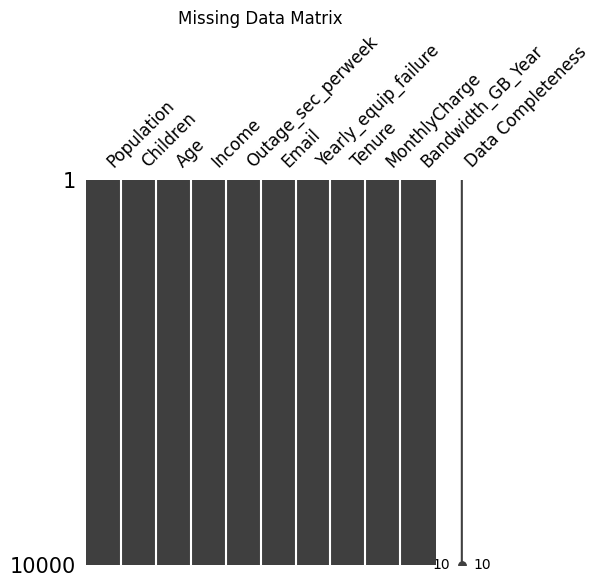

In [15]:
# Check missing data
msno.matrix(df, fontsize = 12, labels=True, figsize=(5,5))
plt.title('Missing Data Matrix')
plt.show()

In [16]:
# Detect potential outliers (Bathelt, 2017)
df_z = (df - df.mean())/df.std(ddof=0)
outlier_cols = df_z.loc[: , (df_z > 3.0).any()].columns
for col in outlier_cols :
    cnt = len(df_z[df_z[col]>3])
    minval, maxval = df[col].min(), df[col].max()
    print('Likely outlier for {0:<20}\t Count: {1:7d} ({2:5.2%} of observations)\tMin: {3:>9.2f}\tMax: {4:>9.2f}'.format(col,cnt,cnt/10000,minval,maxval))

Likely outlier for Population          	 Count:     219 (2.19% of observations)	Min:      0.00	Max: 111850.00
Likely outlier for Children            	 Count:     191 (1.91% of observations)	Min:      0.00	Max:     10.00
Likely outlier for Income              	 Count:     145 (1.45% of observations)	Min:    348.67	Max: 258900.70
Likely outlier for Outage_sec_perweek  	 Count:      15 (0.15% of observations)	Min:      0.10	Max:     21.21
Likely outlier for Email               	 Count:       3 (0.03% of observations)	Min:      1.00	Max:     23.00
Likely outlier for Yearly_equip_failure	 Count:      94 (0.94% of observations)	Min:      0.00	Max:      6.00


## EDA
---

In [17]:
# Numerical variables
for col in df.columns :
    print(f'{col} :')
    print(df[col].describe())

Population :
count     10000.000000
mean       9756.562400
std       14432.698671
min           0.000000
25%         738.000000
50%        2910.500000
75%       13168.000000
max      111850.000000
Name: Population, dtype: float64
Children :
count    10000.0000
mean         2.0877
std          2.1472
min          0.0000
25%          0.0000
50%          1.0000
75%          3.0000
max         10.0000
Name: Children, dtype: float64
Age :
count    10000.000000
mean        53.078400
std         20.698882
min         18.000000
25%         35.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64
Income :
count     10000.000000
mean      39806.926771
std       28199.916702
min         348.670000
25%       19224.717500
50%       33170.605000
75%       53246.170000
max      258900.700000
Name: Income, dtype: float64
Outage_sec_perweek :
count    10000.000000
mean        10.001848
std          2.976019
min          0.099747
25%          8.018214
50%    

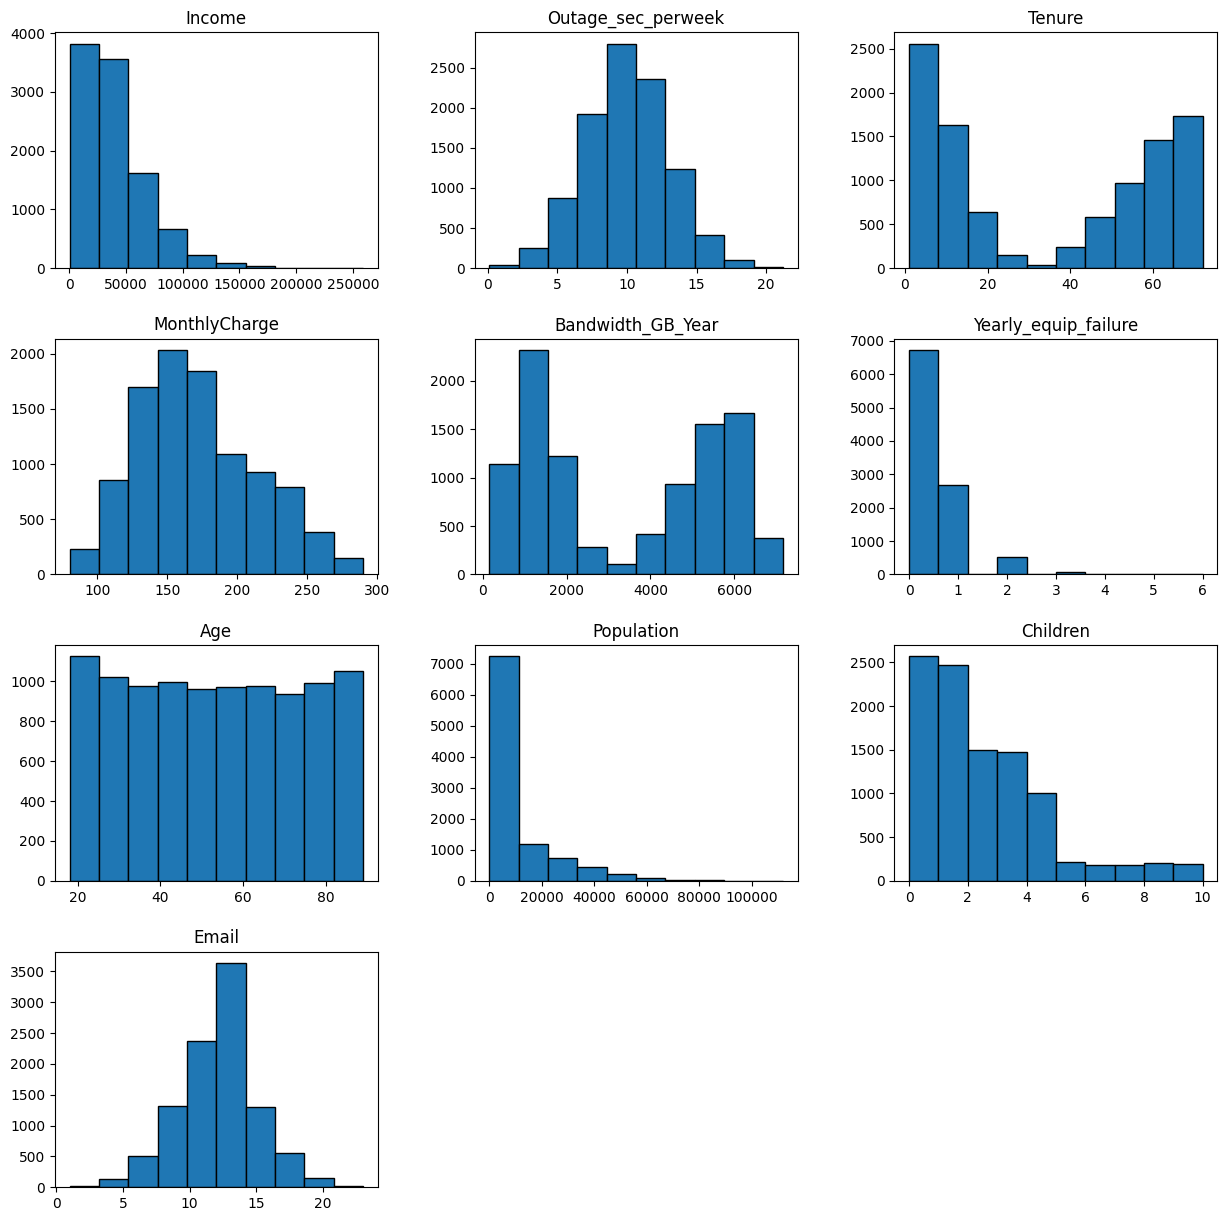

In [18]:
# Independent numeric variables univariate
df.hist(numeric_variables, grid=False, edgecolor='black', figsize=(15,15))
plt.show()

## Transformation
---

In [19]:
# Scaling
scaler = StandardScaler()
scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(scaled, columns = numeric_variables)
print(df_scaled.describe().round(2))

         Income  Outage_sec_perweek    Tenure  MonthlyCharge  \
count  10000.00            10000.00  10000.00       10000.00   
mean      -0.00                0.00     -0.00           0.00   
std        1.00                1.00      1.00           1.00   
min       -0.68               -0.97     -1.69          -1.40   
25%       -0.62               -0.97     -0.87          -0.73   
50%       -0.47               -0.51     -0.00          -0.24   
75%        0.24                0.42      0.87           0.48   
max        7.07                3.69      1.74           7.77   

       Bandwidth_GB_Year  Yearly_equip_failure       Age  Population  \
count           10000.00              10000.00  10000.00    10000.00   
mean                0.00                 -0.00     -0.00        0.00   
std                 1.00                  1.00      1.00        1.00   
min                -3.33                 -3.64     -0.63       -1.27   
25%                -0.67                 -0.67     -0.63       

In [20]:
# Extract prepared data set to CSV
df_scaled.to_csv('churn_prepared.csv', index=False)

## Principal Component Analysis
---

In [21]:
#Fit the model and examine the loadings
pca = PCA(n_components=df_scaled.shape[1], random_state=5470)
pca.fit(df_scaled)
col_names = []
for i in range(df_scaled.shape[1]):
    col_names.append('PC' + str(i+1))

#Examine the loadings
loadings_data = pd.DataFrame(pca.components_.T, columns=col_names, index=df_scaled.columns)
print(loadings_data)

                           PC1       PC2       PC3       PC4       PC5  \
Income               -0.006025 -0.363201  0.187946  0.400505  0.420950   
Outage_sec_perweek    0.014261  0.498828  0.422198  0.020274  0.198588   
Tenure                0.001578 -0.461296 -0.509914  0.081501  0.089465   
MonthlyCharge         0.004411  0.365831 -0.190770  0.003397 -0.234508   
Bandwidth_GB_Year     0.005787 -0.182719  0.363979 -0.566104  0.359404   
Yearly_equip_failure -0.020901 -0.290137  0.470982  0.331946 -0.024896   
Age                   0.017619  0.215066 -0.357742 -0.167310  0.725718   
Population            0.705410 -0.008501 -0.011776  0.048811  0.003400   
Children              0.040428 -0.329753  0.084279 -0.609456 -0.252585   
Email                 0.706909  0.000487  0.022207  0.007568 -0.009868   

                           PC6       PC7       PC8       PC9      PC10  
Income                0.282948  0.491374  0.397053  0.126343 -0.000350  
Outage_sec_perweek    0.171313 -0.30298

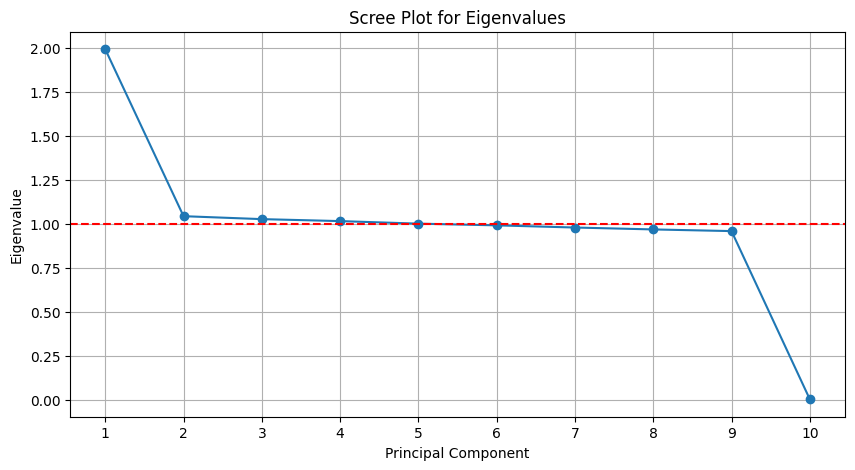

In [22]:
# Calculate and plot eigenvalues (Soriano & Kebabci, n.d.)
eigenvalues = pca.explained_variance_
PC_numbers = np.arange(pca.n_components_) + 1
df_eigen = pd.DataFrame(eigenvalues, index=PC_numbers, columns=['eigen'])

# Scree plot of Eigenvalues [Kaiser rule]
plt.figure(figsize=(10,5))
plt.plot(PC_numbers, 
         eigenvalues, marker='o')
plt.xticks(PC_numbers)
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot for Eigenvalues')
plt.axhline(y=1, color='r', 
            linestyle='--')
plt.grid(True)
plt.show()

In [23]:
# Create final PCA with 5 components and show the final loadings
max_pc = np.max(df_eigen.index[df_eigen['eigen']>=1.0])
pca_final = PCA(n_components=max_pc, random_state=5470)
pca_final.fit(df_scaled)
col_names_final = []
for i in range(max_pc):
    col_names_final.append('PC' + str(i+1))
loadings_data_final = pd.DataFrame(pca_final.components_.T, columns=col_names_final, index=df_scaled.columns)
print(loadings_data_final)

                           PC1       PC2       PC3       PC4       PC5
Income               -0.006025 -0.363201  0.187946  0.400505  0.420950
Outage_sec_perweek    0.014261  0.498828  0.422198  0.020274  0.198588
Tenure                0.001578 -0.461296 -0.509914  0.081501  0.089465
MonthlyCharge         0.004411  0.365831 -0.190770  0.003397 -0.234508
Bandwidth_GB_Year     0.005787 -0.182719  0.363979 -0.566104  0.359404
Yearly_equip_failure -0.020901 -0.290137  0.470982  0.331946 -0.024896
Age                   0.017619  0.215066 -0.357742 -0.167310  0.725718
Population            0.705410 -0.008501 -0.011776  0.048811  0.003400
Children              0.040428 -0.329753  0.084279 -0.609456 -0.252585
Email                 0.706909  0.000487  0.022207  0.007568 -0.009868


In [24]:
# Display the contribution of each PC
print(f"Variance explained by each PC:")
sum = 0.0
for i in range(max_pc):
    sum += pca_final.explained_variance_ratio_[i]
    print(f"\t{loadings_data_final.columns[i]}: {pca_final.explained_variance_ratio_[i]:.2%}")

print(f"\nTotal variance explinaed by selected PCs: {sum:.2%}")

Variance explained by each PC:
	PC1: 19.94%
	PC2: 10.46%
	PC3: 10.29%
	PC4: 10.18%
	PC5: 10.03%

Total variance explinaed by selected PCs: 60.89%
